## One Way Between Subjects ANOVAs in R

### Load Libraries

In [1]:
install.packages("readr")
install.packages("readxl")


The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpnnw6U1/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpnnw6U1/downloaded_packages


In [2]:
library("dplyr")
library("rcompanion")
library("car")
library(readr)
library(readxl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




### Load in Data

In [3]:
netflix <- read_csv('/Users/kenyashiafernandez/Documents/GitHub/Final-Project/Code/netflix_cleaned.csv')
head(netflix)

Rows: 1140 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): title, director, cast, country, rating, duration, genre, type
dbl (2): release_year, imdb_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, Sikander Kher, Angad Bedi, Koel Purie, Pooja Bhamrah, Manu Rishi Chadha",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicole Sougou, Amina Kane, Mariama Gassama, Coumba Dieng, Ibrahima Mbaye, Diankou Sembene","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assumçao, Dev Patel, Alia Shawkat, George Wendt",France,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies",Movie,7.5
Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Love, Deon Cole, La La Anthony, Deysha Nelson, Amarr M. Wooten, Selena-Marie Alphonse, Andrea-Marie Alphonse",United States,2019,TV-PG,94 min,"Children & Family Movies, Dramas",Movie,4.9
Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P Ghani, K Prasanna",India,2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",Movie,7.2
The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charlie Hannah, Barbara Eve Harris, Sonny Surowiec, Jay Cardinal Villeneuve, Tony Massil, Aidan Dee, James Angus Cowan, Anthony Bolognese","Canada, Norway",2019,TV-MA,106 min,"Dramas, Independent Movies",Movie,6.9


## Question Set Up

### Do ratings affect IMDB scores?

## Data Wrangling

In [4]:
colSums(is.na(netflix))

title     director         cast      country release_year       rating 
           0            0            0            0            0            0 
    duration        genre         type   imdb_score 
           0            0            0            0

## No Na Values and DV is already numeric

## Test Assumptions

### Normality

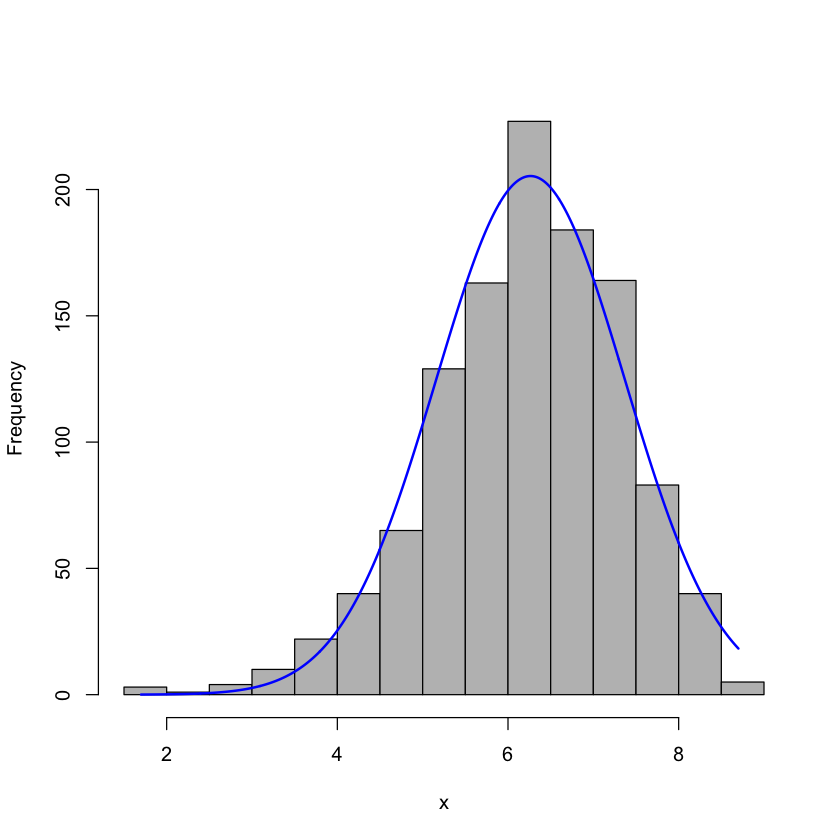

In [5]:
plotNormalHistogram(netflix$imdb_score)

## Slightly negatively skewed, However overall looks pretty normally distributed, I will perform SQRT just to see

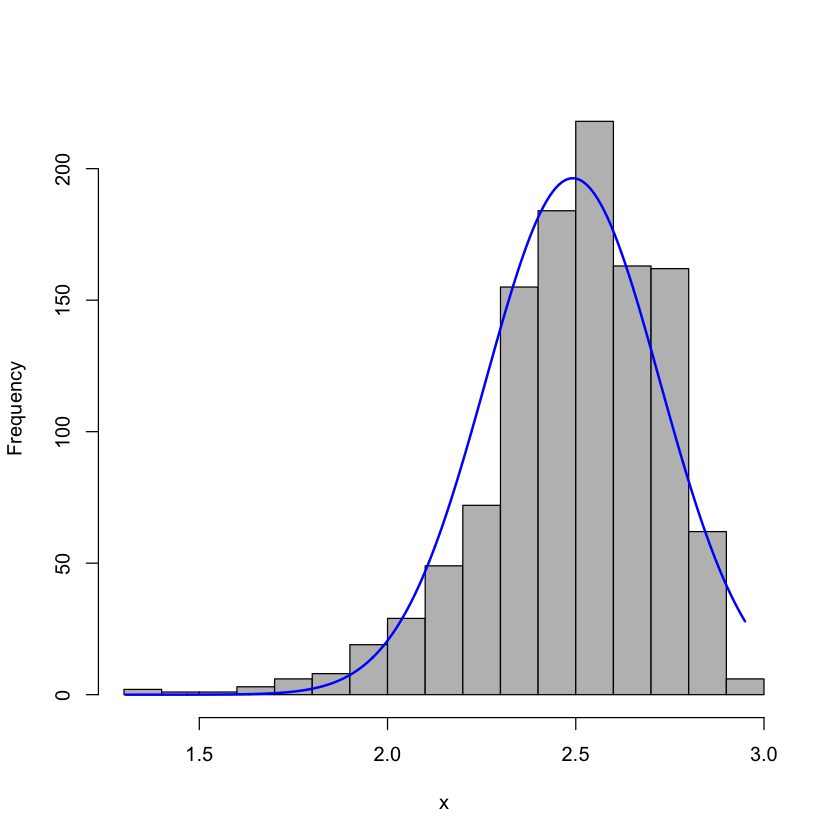

In [6]:
netflix$imdb_scoreSQRT <- sqrt(netflix$imdb_score)
plotNormalHistogram(netflix$imdb_scoreSQRT)

## Not too much of a difference here, I will cube it to triple check

In [7]:
netflix$imdb_scoreCUBE <- netflix$imdb_score ^ 3

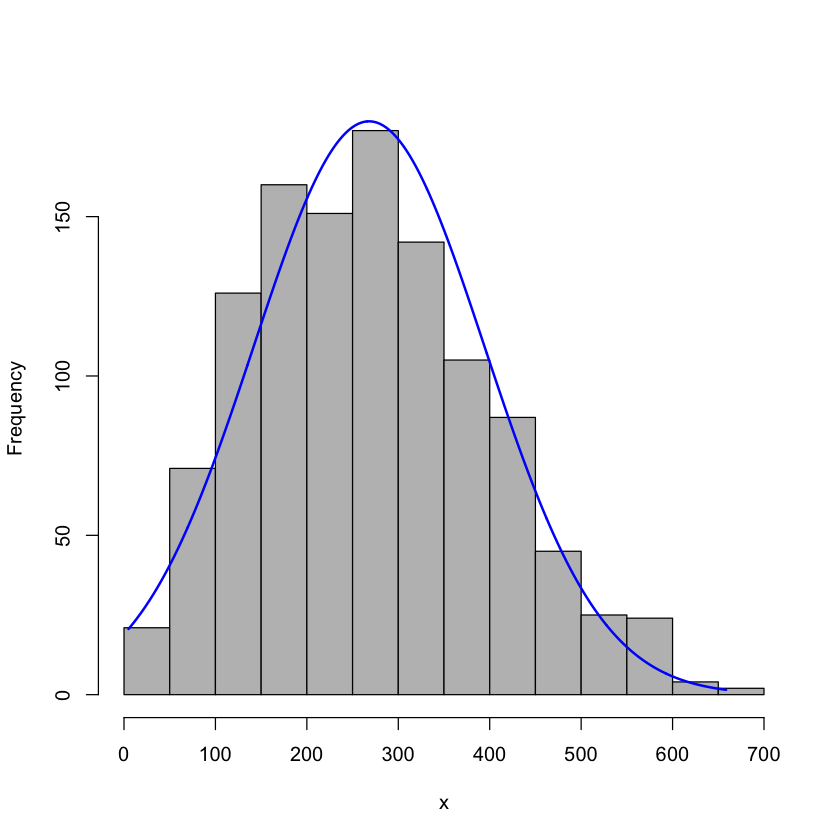

In [8]:
plotNormalHistogram(netflix$imdb_scoreCUBE)

## I would confidently say it looks overall normal

## Homogeneity of Variance

In [9]:
## I will use the Bartlette's test since my data is normally distributed

### Bartlette's test

In [10]:
bartlett.test(imdb_scoreCUBE ~ rating, data=netflix)


	Bartlett test of homogeneity of variances

data:  imdb_scoreCUBE by rating
Bartlett's K-squared = 9.5601, df = 12, p-value = 0.6545


### Fligner's Test

In [11]:
fligner.test(imdb_scoreCUBE ~ rating, data=netflix)


	Fligner-Killeen test of homogeneity of variances

data:  imdb_scoreCUBE by rating
Fligner-Killeen:med chi-squared = 11.697, df = 12, p-value = 0.4703


## The p value associated with this test is > .05, which means that we have met the assumption of homogeneity of variance.

### Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)

In [12]:
netflixANOVA <- aov(netflix$imdb_score ~ netflix$rating)

In [13]:
summary(netflixANOVA)

                 Df Sum Sq Mean Sq F value Pr(>F)  
netflix$rating   12   28.3   2.362   1.945  0.026 *
Residuals      1127 1368.5   1.214                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [14]:
netflixANOVAhetero <- lm(imdb_scoreCUBE ~ rating, data=netflix)
Anova(netflixANOVAhetero, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
rating,12,5.247871,1.176843e-08
Residuals,1127,NA,NA


## 1 star represents a significant value of 0.05 and below: i.e. the p-value of 0.026 IS significant. This means that there is a significant affect of ratings on imdb scores

## Post Hocs

### Computing Post Hocs with No Adjustment

In [15]:
pairwise.t.test(netflix$imdb_scoreCUBE, netflix$rating, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  netflix$imdb_scoreCUBE and netflix$rating 

         G      NR     PG     PG-13  R      TV-14  TV-G   TV-MA  TV-PG  TV-Y  
NR       0.0713 -      -      -      -      -      -      -      -      -     
PG       0.3935 0.0144 -      -      -      -      -      -      -      -     
PG-13    0.1398 0.3096 0.1146 -      -      -      -      -      -      -     
R        0.2034 0.0423 0.2656 0.4163 -      -      -      -      -      -     
TV-14    0.2470 0.0048 0.4145 0.1553 0.4780 -      -      -      -      -     
TV-G     0.3430 0.0902 0.7978 0.3181 0.5719 0.7631 -      -      -      -     
TV-MA    0.1877 0.0251 0.1868 0.4171 0.8465 0.1257 0.5020 -      -      -     
TV-PG    0.1441 0.1645 0.0943 0.8801 0.3738 0.0581 0.3225 0.3149 -      -     
TV-Y     0.4594 0.2035 0.9885 0.4121 0.5983 0.7194 0.8798 0.5597 0.4297 -     
TV-Y7    0.2768 0.2878 0.5858 0.6267 0.9224 0.8949 0.7672 0.8720 0.6612 0.7119
TV-Y7-FV 0.8542 0.0139 0.1

## It appears here that there is a significant difference between a number of these variables when we run post hoc with no adjustment for type one error.

## Considering the possibility of type one error is increased I will double check with a form of correction by using Bonferroni adjustment

### Computing Post Hocs with Bonferroni Adjustment

In [16]:
pairwise.t.test(netflix$imdb_scoreCUBE, netflix$rating, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  netflix$imdb_scoreCUBE and netflix$rating 

         G    NR   PG   PG-13 R    TV-14 TV-G TV-MA TV-PG TV-Y TV-Y7 TV-Y7-FV
NR       1.00 -    -    -     -    -     -    -     -     -    -     -       
PG       1.00 1.00 -    -     -    -     -    -     -     -    -     -       
PG-13    1.00 1.00 1.00 -     -    -     -    -     -     -    -     -       
R        1.00 1.00 1.00 1.00  -    -     -    -     -     -    -     -       
TV-14    1.00 0.37 1.00 1.00  1.00 -     -    -     -     -    -     -       
TV-G     1.00 1.00 1.00 1.00  1.00 1.00  -    -     -     -    -     -       
TV-MA    1.00 1.00 1.00 1.00  1.00 1.00  1.00 -     -     -    -     -       
TV-PG    1.00 1.00 1.00 1.00  1.00 1.00  1.00 1.00  -     -    -     -       
TV-Y     1.00 1.00 1.00 1.00  1.00 1.00  1.00 1.00  1.00  -    -     -       
TV-Y7    1.00 1.00 1.00 1.00  1.00 1.00  1.00 1.00  1.00  1.00 -     -       
TV-Y7-FV 1.00 1.00 1.00 1.00  1.00 1.

## This is a perfect example of why we should apply corrections to post hoc. After applying correction we can see here that there is was a drastic change in the significance and there is actually no significant difference between any of these variables.

## Determine Means and Draw Conclusions

In [17]:
netflixMeans <- netflix %>% group_by(rating) %>% summarize(Mean = mean(imdb_score))

In [18]:
netflixMeans

rating,Mean
<chr>,<dbl>
G,5.050000
NR,6.694737
PG,5.775000
PG-13,6.438889
R,6.243902
TV-14,6.141754
TV-G,6.009091
TV-MA,6.299636
TV-PG,6.409184


### The post-hoc tests for this data that meets the assumption of homogeneity of variance didn't result in a significant difference between ratings imdb scores.